# Neural Network from Scratch in TensorFlow

### Task 1: Introduction and Importing Libraries
### Task 2: Initializing Neural Network
### Task 3: Forward Pass
### Task 4: Computing Loss and Updating Parameters
### Task 5: Predict and Info Functions
### Task 6: Training on Batch
### Task 7: Training on Complete Set
### Task 8: Application
### Task 9: Results

# Task 1: Introduction and Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nn_utils
%matplotlib inline

print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.3.0


# Task 2: Initializing Neural Network

In [2]:
#net = NeuralNewtwork(10,100,11)
#10 features for each example
#11 classes for each example
#100 unit in the hidden layer

class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.L = len(layers)
        self.num_features = layers[0]
        self.num_classes = layers[-1]
        
        self.W = {}
        self.b = {}
        
        self.dW = {}
        self.db = {}
        
        self.setup()
        
    def setup(self):
       
        for i in range(1, self.L):
            self.W[i] = tf.Variable(tf.random.normal(shape=(self.layers[i],self.layers[i-1])))
            self.b[i] = tf.Variable(tf.random.normal(shape=(self.layers[i],1)))

# Task 3: Forward Pass

In [3]:
class NeuralNetwork(NeuralNetwork):
    def forward_pass(self, X):

        A = tf.convert_to_tensor(X, dtype=tf.float32)
        for i in range(1, self.L):
            Z = tf.matmul(A,tf.transpose(self.W[i])) + tf.transpose(self.b[i])
            if i != self.L-1:
                A = tf.nn.relu(Z)
            else:
                A = Z
        return A

# Task 4: Computing Loss and Updating Parameters

In [4]:
class NeuralNetwork(NeuralNetwork):

    def compute_loss(self, A, Y):
        loss = tf.nn.softmax_cross_entropy_with_logits(Y,A)
        return tf.reduce_mean(loss)
    
    
    def update_params(self, lr):
        for i in range(1,self.L):
            self.W[i].assign_sub(lr * self.dW[i])
            self.b[i].assign_sub(lr * self.db[i])

# Task 5: Predict and Info Functions

In [5]:
class NeuralNetwork(NeuralNetwork):
    def predict(self, X):

        A = self.forward_pass(X)
        return tf.argmax(tf.nn.softmax(A), axis=1)
    
    def info(self):
        num_params = 0
        for i in range(1, self.L):
            num_params += self.W[i].shape[0] * self.W[i].shape[1]
            num_params += self.b[i].shape[0]
        print('Input Features:', self.num_features)
        print('Number of Classes:', self.num_classes)
        print('Hidden Layers:')
        print('--------------')
        for i in range(1, self.L-1):
            print('Layer {}, Units {}'.format(i, self.layers[i]))
        print('--------------')
        print('Number of parameters:', num_params)

# Task 6: Training on Batch

In [6]:
class NeuralNetwork(NeuralNetwork):
    def train_on_batch(self, X, Y, lr):
         
        X = tf.convert_to_tensor(X, dtype=tf.float32)
        Y = tf.convert_to_tensor(Y, dtype=tf.float32)
          
        with tf.GradientTape(persistent=True) as tape:
            A = self.forward_pass(X)
            loss = self.compute_loss(A, Y)
        for i in range(1, self.L):
            self.dW[i] = tape.gradient(loss, self.W[i])
            self.db[i] = tape.gradient(loss, self.b[i])
        del tape
        self.update_params(lr)
        return loss.numpy()

# Task 7: Training on Complete Set

In [7]:
class NeuralNetwork(NeuralNetwork):
    def train(self, x_train, y_train, x_test, y_test, epochs, steps_per_epoch, batch_size, lr):

        history = {
            'val_loss':[],
            'train_loss':[],
            'val_acc':[]
        }
        
        for e in range(0, epochs):
            epoch_train_loss = 0.
            print('Epoch{}'.format(e), end='.')
            for i in range(0, steps_per_epoch):
                x_batch = x_train[i*batch_size:(i+1)*batch_size]
                y_batch = y_train[i*batch_size:(i+1)*batch_size]
                
                batch_loss = self.train_on_batch(x_batch, y_batch,lr)
                epoch_train_loss += batch_loss
                
                if i%int(steps_per_epoch/10) == 0:
                    print(end='.')
                    
            history['train_loss'].append(epoch_train_loss/steps_per_epoch)
            val_A = self.forward_pass(x_test)
            val_loss = self.compute_loss(val_A, y_test).numpy()
            history['val_loss'].append(val_loss)
            val_preds = self.predict(x_test)
            val_acc =    np.mean(np.argmax(y_test, axis=1) == val_preds.numpy())
            history['val_acc'].append(val_acc)
            print('Val acc:',val_acc)
        return history

# Task 8: Application

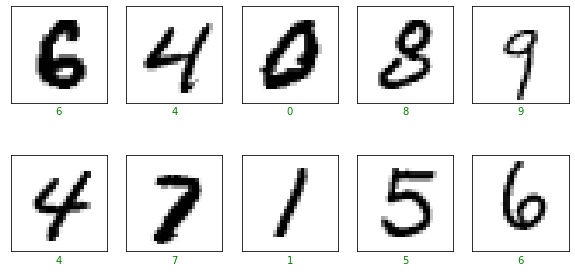

In [8]:
(x_train, y_train), (x_test, y_test) = nn_utils.load_data()
nn_utils.plot_random_examples(x_train, y_train).show()

In [9]:
net = NeuralNetwork([784,128,128,10])
net.info()

Input Features: 784
Number of Classes: 10
Hidden Layers:
--------------
Layer 1, Units 128
Layer 2, Units 128
--------------
Number of parameters: 118282


In [10]:
batch_size = 120
epochs = 5
steps_per_epoch = int(x_train.shape[0]/batch_size)
lr = 3e-3
print('Steps per epoch', steps_per_epoch)

Steps per epoch 500


In [11]:
history = net.train(
    x_train,y_train,
    x_test, y_test,
    epochs, steps_per_epoch,
    batch_size, lr)

Epoch0...........Val acc: 0.8035
Epoch1...........Val acc: 0.8366
Epoch2...........Val acc: 0.8515
Epoch3...........Val acc: 0.8578
Epoch4...........Val acc: 0.8665


# Task 9: Results

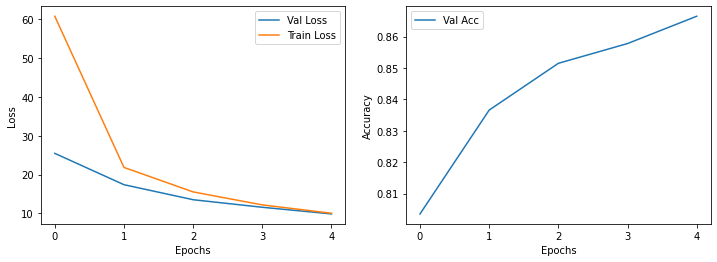

In [12]:
nn_utils.plot_results(history).show()

In [13]:
preds = net.predict(x_test)

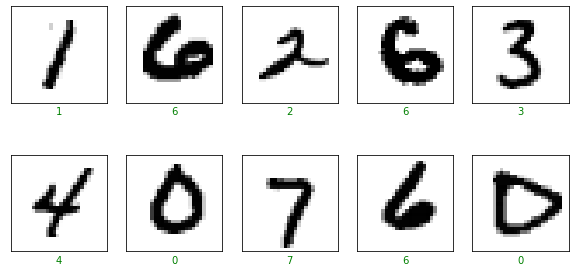

In [14]:
nn_utils.plot_random_examples(x_test, y_test, preds.numpy()).show()